## Bamboo Weekly 7 | Bank Failures
Last week, Silicon Valley Bank collapsed. How often does this happen? Where are collapsed banks located, and big are they?

Source: https://www.bambooweekly.com/p/bw-7-bank-failures

In [17]:
from urllib.request import urlretrieve
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
# import mondin.pandas as pd
print("Setup Complete")


Setup Complete


In [267]:
# Fetch data
url = "https://pfabankapi.app.cloud.gov/api/failures?fields=NAME%2CCERT%2CFIN%2CCITYST%2CFAILDATE%2CSAVR%2CRESTYPE%2CCOST%2CRESTYPE1%2CCHCLASS1%2CQBFDEP%2CQBFASSET&filters=FAILYR%3A%5B1934%20TO%202023%5D&limit=10000&react=true&sort_by=FAILDATE&sort_order=desc&subtotal_by=RESTYPE&total_fields=QBFDEP%2CQBFASSET%2CCOST&format=csv&download=true&filename=bank-data"
csv_file, _ = urlretrieve(url, filename="bank_data.csv")

In [268]:
# Fetch data from FDIC
df = pd.read_csv(csv_file, parse_dates=["FAILDATE"])
df

,CERT,CHCLASS1,CITYST,COST,FAILDATE,FIN,ID,NAME,QBFASSET,QBFDEP,RESTYPE,RESTYPE1,SAVR
0,15426.0,NM,"ALMENA, KS",16806.0,2020-10-23,10538,4104,ALMENA STATE BANK,65733.0,64941.0,FAILURE,PA,DIF
1,16748.0,NM,"FORT WALTON BEACH, FL",7247.0,2020-10-16,10537,4103,FIRST CITY BANK OF FLORIDA,136566.0,133936.0,FAILURE,PA,DIF
2,14361.0,NM,"BARBOURSVILLE, WV",45913.0,2020-04-03,10536,4102,THE FIRST STATE BANK,151808.0,143102.0,FAILURE,PA,DIF
3,18265.0,NM,"ERICSON, NE",25293.0,2020-02-14,10535,4101,ERICSON STATE BANK,100879.0,95159.0,FAILURE,PA,DIF
4,21111.0,N,"NEWARK, NJ",1946.0,2019-11-01,10534,4100,CITY NATIONAL BANK OF NEW JERSEY,120574.0,111234.0,FAILURE,PA,DIF
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4099,NaN,NM,"LEWISPORT, KY",NaN,1934-08-06,0,137,BANK OF LEWISPORT,81.0,68.0,FAILURE,PO,BIF
4100,NaN,N,"LIMA, MT",NaN,1934-07-18,0,135,FIRST NATIONAL BANK OF LIMA,91.0,42.0,FAILURE,PO,BIF
4101,NaN,NM,"FLORENCE, IN",NaN,1934-07-18,0,136,FLORENCE DEPOSIT BANK,105.0,69.0,FAILURE,PO,BIF
4102,NaN,NM,"EAST PEORIA, IL",NaN,1934-05-28,0,133,FON DU LAC STATE BANK,374.0,238.0,FAILURE,PO,BIF


In [3]:
# check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4104 entries, 0 to 4103
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   CERT      3616 non-null   float64       
 1   CHCLASS1  4104 non-null   object        
 2   CITYST    4104 non-null   object        
 3   COST      3466 non-null   float64       
 4   FAILDATE  4104 non-null   datetime64[ns]
 5   FIN       4104 non-null   int64         
 6   ID        4104 non-null   int64         
 7   NAME      4104 non-null   object        
 8   QBFASSET  3950 non-null   float64       
 9   QBFDEP    4102 non-null   float64       
 10  RESTYPE   4104 non-null   object        
 11  RESTYPE1  4104 non-null   object        
 12  SAVR      4104 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 416.9+ KB


In [4]:
# check data
df.describe()

,CERT,COST,FIN,ID,QBFASSET,QBFDEP
count,3616.000000,3.466000e+03,4104.000000,4104.000000,3.950000e+03,4.102000e+03
mean,24504.804204,7.471823e+04,4168.962963,2052.500000,1.233136e+06,6.459172e+05
std,11630.283192,3.234848e+05,3326.075367,1184.867081,3.090708e+07,1.569257e+07
min,40.000000,-1.138100e+04,0.000000,1.000000,1.400000e+01,0.000000e+00
25%,18275.500000,3.155000e+03,1752.750000,1026.750000,1.791825e+04,1.462200e+04
50%,26354.500000,1.129600e+04,2964.500000,2052.500000,5.542250e+04,4.938900e+04
75%,30985.500000,4.277825e+04,7026.250000,3078.250000,1.953918e+05,1.748515e+05
max,91189.000000,1.204008e+07,12894.000000,4104.000000,1.471631e+09,9.546776e+08


In [5]:
# Q1- According to our document, how many bank failures have there been since the FDIC was opened?
bank_failures_num = df["RESTYPE"].loc[df["RESTYPE"] == "FAILURE"].count()
bank_assistance_num = df["RESTYPE"].loc[df["RESTYPE"] == "ASSISTANCE"].count()
print(f"The number of bank failures from 1934 to 2023 is: {bank_failures_num:,}")
print(f"The number of bank assistance from 1934 to 2023 is: {bank_assistance_num:,}")
print(
    f"The TOTAL number of bank failed and assisted from 1934 to 2023 is: {bank_failures_num+bank_assistance_num:,}"
)


The number of bank failures from 1934 to 2023 is: 3,525
The number of bank assistance from 1934 to 2023 is: 579
The TOTAL number of bank failed and assisted from 1934 to 2023 is: 4,104


In [6]:
# Q1A- Follow-up questions, how many are unique banks failed more than once since the FDIC was opened?
df_banks_unique = (df[["NAME", "RESTYPE"]]
                        .value_counts(ascending=False)
                        .to_frame(name="NUM")
                        .reset_index()
                    )
df_banks_unique
# Count only banks with more than 1 failure
df_failed = df_banks_unique.loc[(df_banks_unique["NUM"] > 1) & (df_banks_unique["RESTYPE"]=="FAILURE")]
print(f"There are {df_failed.shape[0]:,} unique banks failed since the FDIC opened")

There are 133 unique banks failed since the FDIC opened


In [7]:
# Q2- What was the earliest failure in our data set? What is the most recent failure in our data set?
earliest_failed_bank = df.loc[df["FAILDATE"] == df["FAILDATE"].min()]
bank_name = earliest_failed_bank["NAME"].iloc[0]
date_of_failure = earliest_failed_bank["FAILDATE"].iloc[0].date().strftime("%B %d, %Y")
day_of_failure = earliest_failed_bank["FAILDATE"].iloc[0].day_name()
print(f'{bank_name.lower()} is the first one to failed on {date_of_failure}, {day_of_failure}')

bank of america trust co. is the first one to failed on April 19, 1934, Thursday


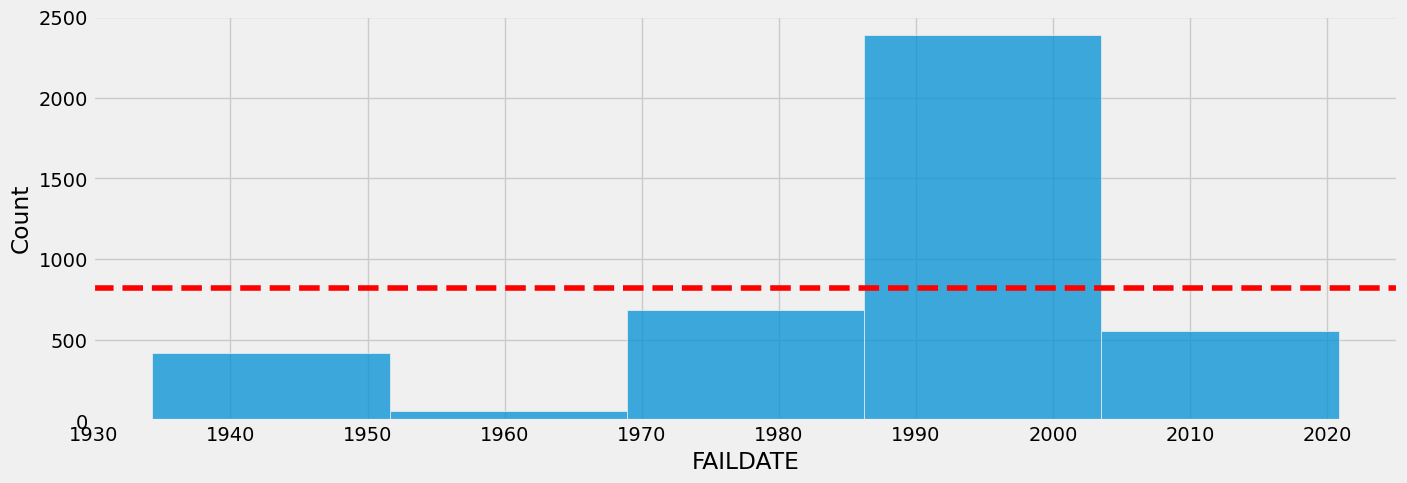

In [26]:
# Q3- In which five years did the greatest number of banks fail?
plt.style.use("fivethirtyeight")
plt.figure(figsize=(15,5))

# Plot Histogram
sns.histplot(df, x=df["FAILDATE"], bins=5)

# calculate the average count
convert_faildate = df['FAILDATE'].astype(int) // 10**9 * 2.5
bin_counts, _ = np.histogram(convert_faildate, bins=5)
avg_count = np.mean(bin_counts)

# plot a horizontal line at the average count
plt.axhline(y=avg_count, color='r', linestyle='--')

plt.show()

# During the years 1990-1995 and 1995-2000 there are more than 2000 banks failed.
# Other source: https://www.cfr.org/timeline/us-financial-crisis

In [254]:
df_ = df.assign(STATE=list(map(lambda x: x.split(",")[-1], df["CITYST"])))
df_.head()

,CERT,CHCLASS1,CITYST,COST,FAILDATE,FIN,ID,NAME,QBFASSET,QBFDEP,RESTYPE,RESTYPE1,SAVR,STATE
0,15426.0,NM,"ALMENA, KS",16806.0,2020-10-23,10538,4104,ALMENA STATE BANK,65733.0,64941.0,FAILURE,PA,DIF,KS
1,16748.0,NM,"FORT WALTON BEACH, FL",7247.0,2020-10-16,10537,4103,FIRST CITY BANK OF FLORIDA,136566.0,133936.0,FAILURE,PA,DIF,FL
2,14361.0,NM,"BARBOURSVILLE, WV",45913.0,2020-04-03,10536,4102,THE FIRST STATE BANK,151808.0,143102.0,FAILURE,PA,DIF,WV
3,18265.0,NM,"ERICSON, NE",25293.0,2020-02-14,10535,4101,ERICSON STATE BANK,100879.0,95159.0,FAILURE,PA,DIF,NE
4,21111.0,N,"NEWARK, NJ",1946.0,2019-11-01,10534,4100,CITY NATIONAL BANK OF NEW JERSEY,120574.0,111234.0,FAILURE,PA,DIF,NJ


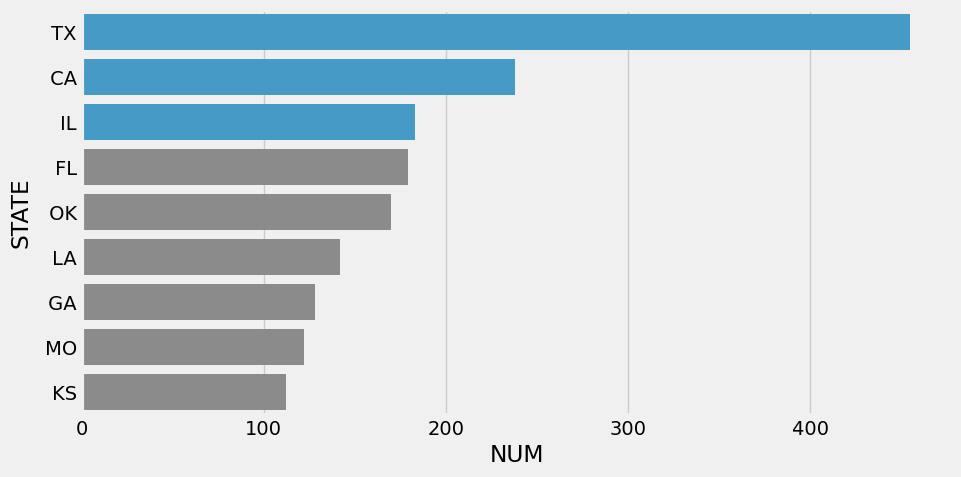

In [99]:
# Q4-In which three states were the greatest number of failed banks?
df_top3 = (df_[["STATE","RESTYPE"]]
                        .value_counts(ascending=False)
                        .to_frame(name="NUM")
                        .reset_index()
                        .nlargest(n=10, columns=["NUM"])

        )
# Style
plt.style.use("fivethirtyeight")
plt.figure(figsize=(10,5))

# Rank the values in each column and create a color palette based on the rank
largest_b = df_top3['NUM'].nlargest(3).values
color_palette = ['#30a2da' 
                 if x in largest_b else '#8b8b8b' 
                 for x in df_top3['NUM']
        ]

# Plot histogram
sns.barplot(data=df_top3, 
            x="NUM", 
            y="STATE", 
            errorbar=None,
            palette=color_palette
        )

plt.show()
# The top 3 states with the highest bank failures are Texas, California, Illinois

In [100]:
df_.head(n=2)

,CERT,CHCLASS1,CITYST,COST,FAILDATE,FIN,ID,NAME,QBFASSET,QBFDEP,RESTYPE,RESTYPE1,SAVR,STATE
0,15426.0,NM,"ALMENA, KS",16806.0,2020-10-23,10538,4104,ALMENA STATE BANK,65733.0,64941.0,FAILURE,PA,DIF,KS
1,16748.0,NM,"FORT WALTON BEACH, FL",7247.0,2020-10-16,10537,4103,FIRST CITY BANK OF FLORIDA,136566.0,133936.0,FAILURE,PA,DIF,FL


In [158]:
# What was the average market capitalization of the banks that failed? 
# Given a capitalization of $200b, did that make SVB above, below, or about average?
df_mc = df.assign(MARKET_CAP=df["QBFASSET"]-df["QBFDEP"])
df_by_charter = (df_mc[["CHCLASS1", "MARKET_CAP"]]
                 .groupby(by=["CHCLASS1"])
                 .mean()
                 .sort_values(by=["MARKET_CAP"], ascending=False)
                 .reset_index()
            )

# print(df_by_charter)
# SVB is a national bank charter (N),
national_bank = df_by_charter['MARKET_CAP'].loc[df_by_charter['CHCLASS1']=='N'][0]
print(f"The average market capitalization of national member banks is {national_bank:,.2f}")
# at 200B market cap SVB is above the average market cap for national member banks

The average market capitalization of national member banks is 2,295,180.03


In [178]:
date_of_failure = earliest_failed_bank["FAILDATE"].iloc[0]
date_of_failure

Timestamp('1934-04-19 00:00:00')

In [170]:
# Q6- When was the most recent failure greater than SVB?
bank_recent = df_.sort_values(by=["FAILDATE"], ascending=False)["NAME"][0]
print(f"The bank that recently failed is {bank_recent}")

The bank that recently failed is ALMENA STATE BANK


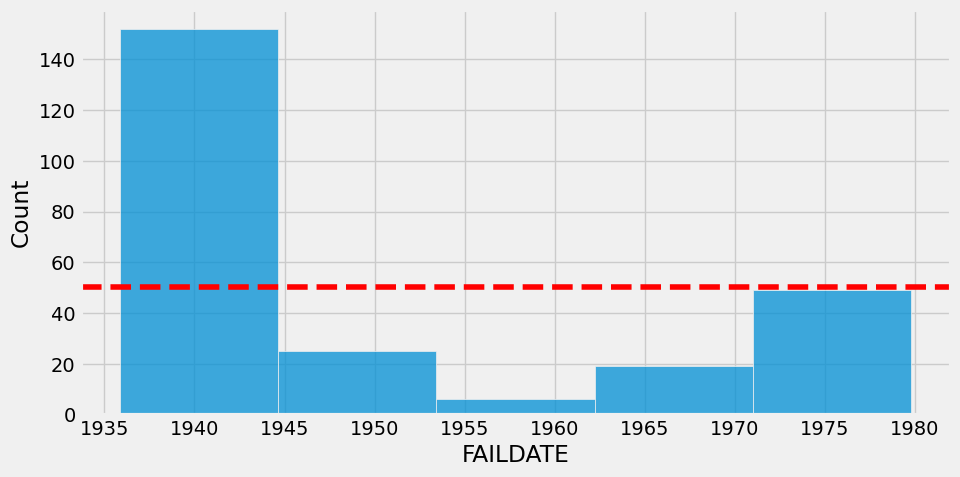

In [189]:
# Q7-Bank failures can be resolved in several different ways. 
# How often, historically, have we seen each resolution? 
# Were the odds good that SVB's uninsured depositors would get their money?

# What we are looking for the RESTYPE1 P&A
# Style
plt.style.use("fivethirtyeight")
plt.figure(figsize=(10,5))

# Filter on RESTYPE1 P&A
df_ = df_.loc[df_["RESTYPE1"]=="P&A"]

# Plot Histogram
sns.histplot(df_, x=df_["FAILDATE"], bins=5)

# calculate the average count
convert_faildate = df_['FAILDATE'].astype(int) // 10**9 * 2.5
bin_counts, _ = np.histogram(convert_faildate, bins=5)
avg_count = np.mean(bin_counts)

# plot a horizontal line at the average count
plt.axhline(y=avg_count, color='r', linestyle='--')

plt.show()

# The odds are slim since the last time P&A resolution was given was in 1980. thats 37 years ago

In [193]:
# Q7-resolution breakdown
df_.value_counts(subset=["RESTYPE1"]).to_frame(name="num_banks").reset_index()

,RESTYPE1,num_banks
0,PA,2097
1,A/A,579
2,PO,573
3,IDT,386
4,P&A,251
5,PI,140
6,MGR,37
7,ABT,16
8,OBAM,13
9,DINB,9


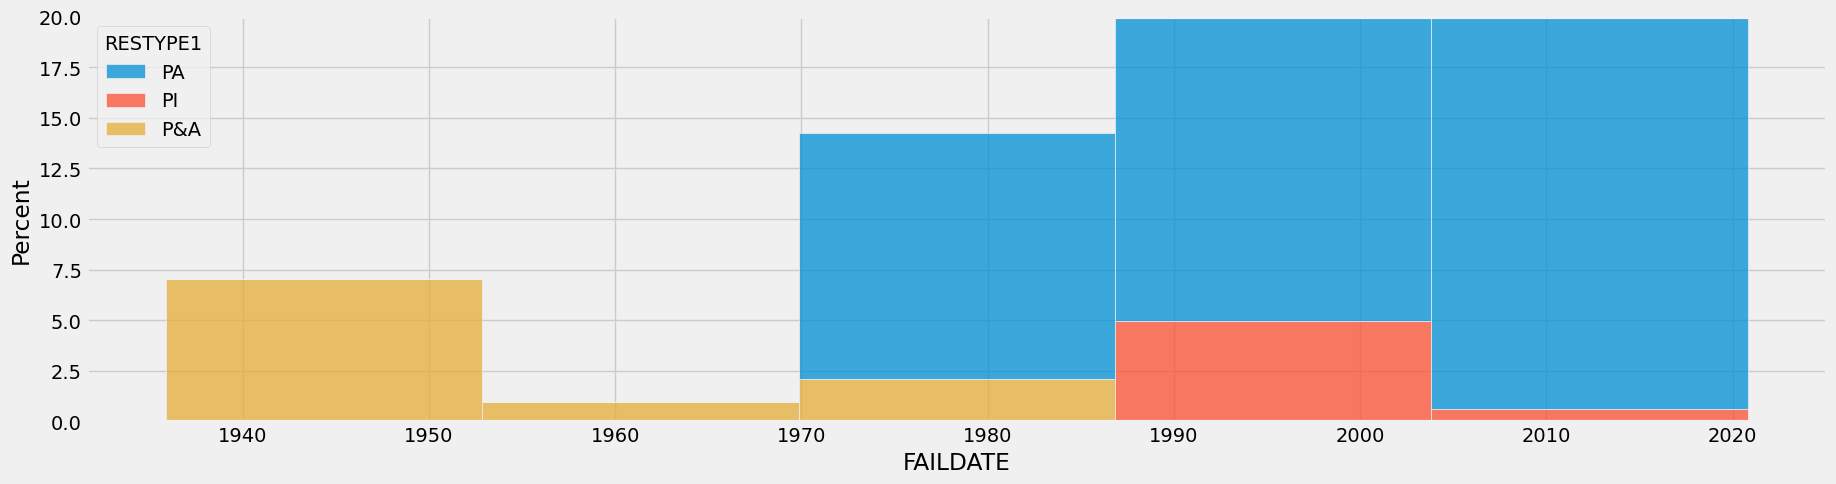

In [236]:
# Q7-If we are only to consider PA resolutions
# Style
plt.style.use("fivethirtyeight")
plt.figure(figsize=(20, 5))

df_filtered = df_.loc[df_["RESTYPE1"].isin(["PA", "P&A", "PI"])]
# Plot Histogram
sns.histplot(
    df_filtered,
    x=df_filtered["FAILDATE"],
    bins=5,
    stat="percent",
    hue=df_filtered["RESTYPE1"],
    multiple="stack",
)

# calculate the average count
convert_faildate = df_filtered["FAILDATE"].astype(int) // 10**9 * 2.5
bin_counts, _ = np.histogram(convert_faildate, bins=5)
avg_count = np.mean(bin_counts)
total_count = len(convert_faildate)
avg_perc = (avg_count / total_count) * 100

# plot a horizontal line at the average count
plt.axhline(y=avg_perc, color="r", linestyle="--", lw=2)
# set limit
plt.ylim(0, 20)
plt.show()

# Based on this graph, we cannot even see P&A, the best resolution for SVB based on historical data
# from the web, 
# In general, the odds of recovering uninsured deposits in a PA transaction are likely to be lower than in a P&A transaction, 
# as the acquiring institution is taking on all of the failed institution's deposits, including uninsured deposits, 
# and the amount of funds recovered from the sale of the failed institution's assets may not be sufficient to cover all deposits. 
# As such, there is a risk that uninsured depositors may only receive a fraction of their deposits or may lose their funds entirely.


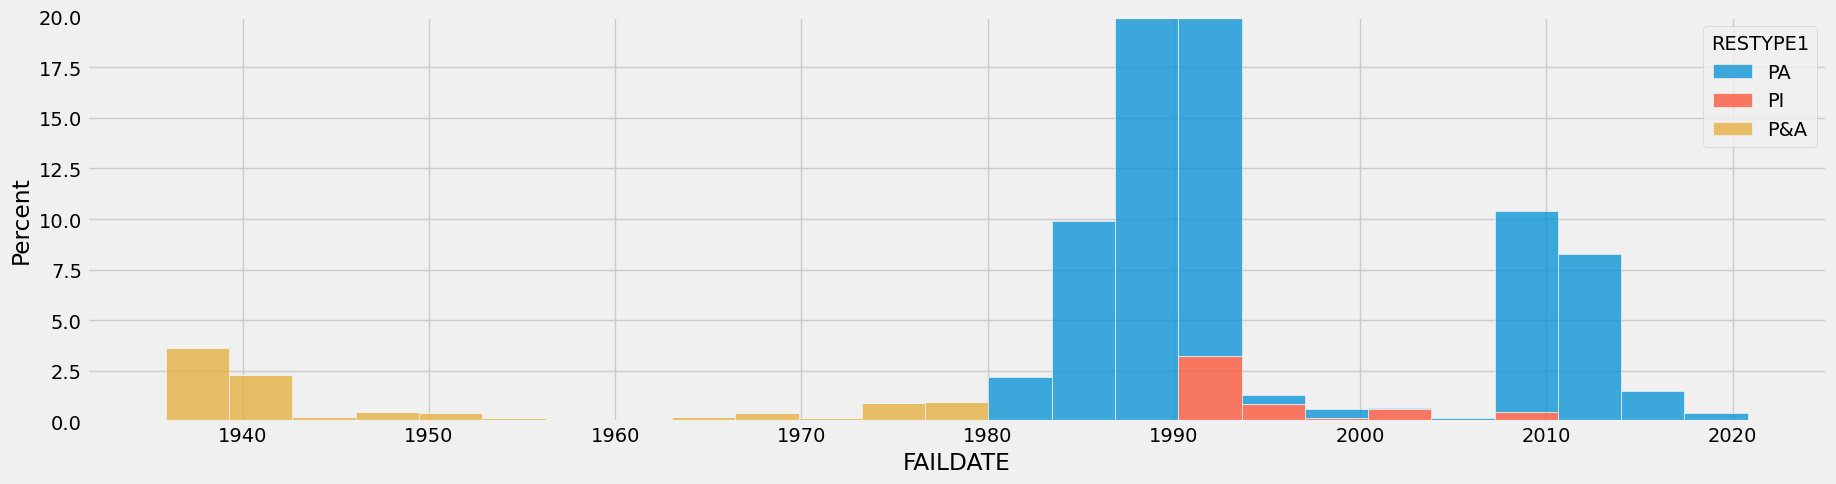

In [237]:
# Q8-What about bank failures in the last 25 years -- if we just look at those, do the odds change?
# Style
plt.style.use("fivethirtyeight")
plt.figure(figsize=(20, 5))

df_filtered = df_.loc[df_["RESTYPE1"].isin(["PA", "P&A", "PI"])]
# Plot Histogram
sns.histplot(
    df_filtered,
    x=df_filtered["FAILDATE"],
    bins=25,
    stat="percent",
    hue=df_filtered["RESTYPE1"],
    multiple="stack",
)

# calculate the average count
convert_faildate = df_filtered["FAILDATE"].astype(int) // 10**9 * 2.5
bin_counts, _ = np.histogram(convert_faildate, bins=5)
avg_count = np.mean(bin_counts)
total_count = len(convert_faildate)
avg_perc = (avg_count / total_count) * 100

# plot a horizontal line at the average count
plt.axhline(y=avg_perc, color="r", linestyle="--", lw=2)
# set limit
plt.ylim(0, 20)
plt.show()

# Well it does not seems to increase the odds, what we are seeing is a decline in PA from 2010 to 2020.

In [238]:
df_.head(n=2)

,CERT,CHCLASS1,CITYST,COST,FAILDATE,FIN,ID,NAME,QBFASSET,QBFDEP,RESTYPE,RESTYPE1,SAVR,STATE
0,15426.0,NM,"ALMENA, KS",16806.0,2020-10-23,10538,4104,ALMENA STATE BANK,65733.0,64941.0,FAILURE,PA,DIF,KS
1,16748.0,NM,"FORT WALTON BEACH, FL",7247.0,2020-10-16,10537,4103,FIRST CITY BANK OF FLORIDA,136566.0,133936.0,FAILURE,PA,DIF,FL


In [255]:
#Q8-What was the mean estimated loss in bank failures? 
df_loss_mean = df_["COST"].mean()
print(f"The mean loss in bank failures is: {df_loss_mean:,.2f}")

The mean loss in bank failures is: 74,718.23


In [266]:
# Q8-What proportion of a bank's assets did this generally involve?
df_qbfasset_mean = df_["QBFASSET"].mean()
df_perc = df_loss_mean / df_qbfasset_mean 
print(f"The percentage of estimated loss is: {df_perc:.2%}")

The percentage of estimated loss is: 6.06%


In [262]:
# Q8A-What proportion of a bank's assets did this generally involve per bank?
df_by_qbfasset_ = (df_
                   .assign(PERC_COST_QBFASSET=(df_["COST"] / df_["QBFASSET"])*100)
                   .sort_values(by=["PERC_COST_QBFASSET"], ascending=False)
            )
df_by_qbfasset_.nlargest(n=5, columns=["PERC_COST_QBFASSET"])

# hmmm 1000% ratio of cost/asset in Meridian Saving. that cant be good.


,CERT,CHCLASS1,CITYST,COST,FAILDATE,FIN,ID,NAME,QBFASSET,QBFDEP,RESTYPE,RESTYPE1,SAVR,STATE,PERC_COST_QBFASSET
1778,32048.0,SL,"ARLINGTON, TX",531288.0,1989-04-06,6962,2338,MERIDIAN SAVING ASSOCIATION,48872.0,434862.0,FAILURE,IDT,RTC,TX,1087.100999
2145,30576.0,SL,"ABILENE, TX",415692.0,1988-10-14,1808,1959,SOUTHWEST S&LA,154345.0,328807.0,ASSISTANCE,A/A,FSLIC,TX,269.326509
2075,29219.0,SL,"DALLAS, TX",1345027.0,1988-12-22,1810,2024,COMMODORE SAVINGS ASSOCIATION,499435.0,1139370.0,ASSISTANCE,A/A,FSLIC,TX,269.309720
1880,32544.0,SL,"TEXARKANA, TX",563188.0,1989-03-16,7250,2270,SECURITY SAVINGS ASSOCIATION,236328.0,471415.0,FAILURE,PO,RTC,TX,238.307776
1932,32616.0,SL,"BELLAIRE, TX",803336.0,1989-03-09,7404,2219,"CONTINENTAL SAVINGS, A FS & LA",354586.0,587427.0,FAILURE,PO,RTC,TX,226.556040


In [251]:
df_by_qbfasset = (
    df_[["CHCLASS1", "QBFASSET"]]
    .groupby(by=["CHCLASS1"])
    .mean()
    .sort_values(by=["QBFASSET"], ascending=False)
    .reset_index()
    .assign(PERC_COST_QBFASSET=df_["COST"] / df_["QBFASSET"].sum()*100)
)

df_by_qbfasset


,CHCLASS1,QBFASSET,PERC_COST_QBFASSET
0,N,4.121229e+06,0.000345
1,SB,2.377452e+06,0.000149
2,MI,1.191583e+06,0.000943
3,SI,9.080956e+05,0.000519
4,SL,4.656090e+05,0.000040
5,SM,2.117470e+05,0.000089
6,NM,1.925688e+05,0.000032
